# circle - non linear dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.manifold import TSNE

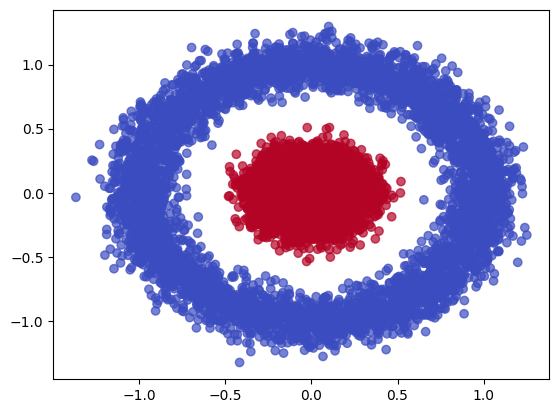

In [2]:
X, y = make_circles(n_samples=10000, noise=0.1, factor=0.2, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.1, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [3]:
df_circles = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df_circles["target"] = y

In [4]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target
0,0.161097,0.282602,0.019966,0.062570,0.075801,-0.075423,0.044386,-0.086364,0.033343,-0.083510,1
1,1.198440,-0.542104,-0.050118,-0.102131,-0.104756,-0.024050,0.017934,0.024843,0.253703,0.139924,0
2,-0.618907,0.728517,-0.086775,0.021638,0.026716,0.127294,-0.341050,0.134362,0.047023,0.073340,0
3,1.070839,-0.340617,-0.093467,-0.004380,0.134571,-0.110410,-0.120804,0.057169,0.299109,0.168765,0
4,0.843196,-0.502865,-0.057546,-0.022287,0.005023,0.288498,0.007367,0.139431,0.004977,-0.097871,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.076554,-0.052839,-0.029814,-0.152620,0.021773,0.078145,-0.009453,0.049515,1
9996,0.239543,0.141312,0.014218,0.133152,-0.161376,-0.008163,0.033173,0.101329,-0.020064,0.057174,1
9997,0.108542,0.082195,-0.153277,-0.099898,-0.005207,-0.019770,-0.065780,0.094447,0.148459,-0.095392,1
9998,0.483035,0.891054,0.061409,0.225951,-0.057134,0.071337,-0.165984,-0.119157,0.051961,-0.023867,0


### correlation matrix

In [5]:
df_circles.iloc[:,:-1].corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_1,1.000000,0.001393,0.006565,0.013710,0.006194,0.001359,-0.002265,0.004709,0.003442,-0.008744
Feature_2,0.001393,1.000000,0.001585,0.004699,0.015901,0.004388,-0.014158,-0.007963,0.012791,0.008527
Feature_3,0.006565,0.001585,1.000000,0.004591,-0.004815,0.000029,-0.010137,0.019410,-0.011425,-0.004854
Feature_4,0.013710,0.004699,0.004591,1.000000,0.003524,-0.000657,0.014812,0.022650,0.010918,-0.017157
Feature_5,0.006194,0.015901,-0.004815,0.003524,1.000000,0.002530,0.009041,0.002284,0.006936,0.003893
Feature_6,0.001359,0.004388,0.000029,-0.000657,0.002530,1.000000,-0.011835,-0.003846,0.011552,0.001144
Feature_7,-0.002265,-0.014158,-0.010137,0.014812,0.009041,-0.011835,1.000000,-0.002939,0.009217,0.003578
Feature_8,0.004709,-0.007963,0.019410,0.022650,0.002284,-0.003846,-0.002939,1.000000,-0.002279,0.011683
Feature_9,0.003442,0.012791,-0.011425,0.010918,0.006936,0.011552,0.009217,-0.002279,1.000000,0.008805
Feature_10,-0.008744,0.008527,-0.004854,-0.017157,0.003893,0.001144,0.003578,0.011683,0.008805,1.000000


<Axes: >

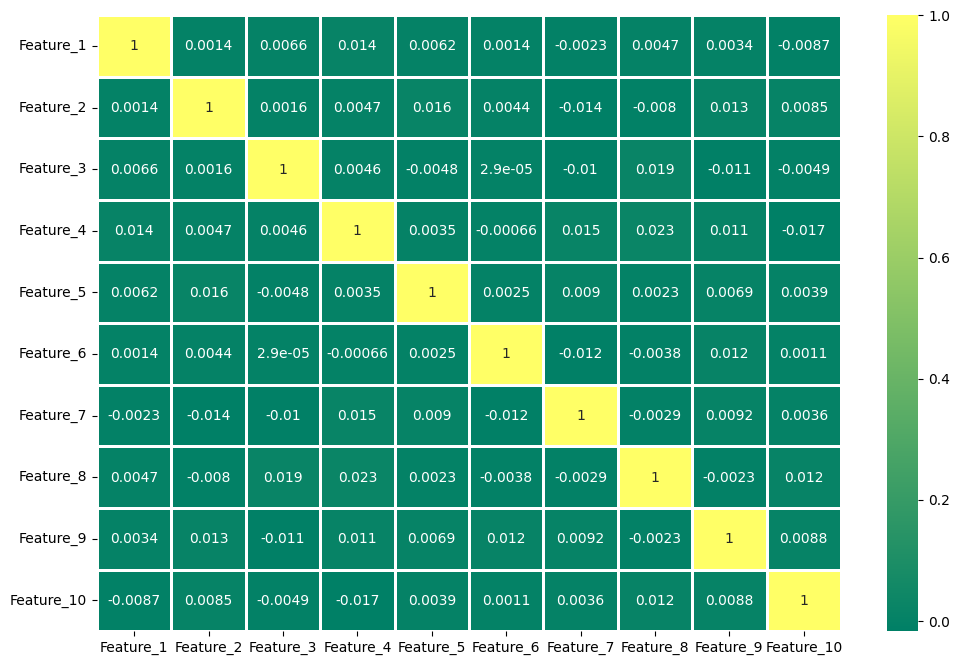

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df_circles.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [7]:
X_values = df_circles.iloc[:,:-1].values

In [8]:
y_values = df_circles.iloc[:,-1].values

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_values = scaler.fit_transform(X_values)

In [12]:
np.mean(X_values),np.std(X_values)

(-9.663381206337363e-18, 1.0000000000000009)

In [13]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,0.309049,0.544134,0.209496,0.620695,0.775153,-0.767447,0.433526,-0.869471,0.340874,-0.841644
1,2.313386,-1.040751,-0.489216,-1.026786,-1.025889,-0.249431,0.170025,0.237866,2.548649,1.387179
2,-1.198062,1.401072,-0.854676,0.211258,0.285531,1.276648,-3.406075,1.328387,0.477941,0.722986
3,2.066837,-0.653542,-0.921397,-0.048998,1.361378,-1.120243,-1.212046,0.559752,3.003573,1.674877
4,1.626991,-0.965343,-0.563274,-0.228115,0.069143,2.902149,0.064759,1.378863,0.056677,-0.984907
...,...,...,...,...,...,...,...,...,...,...
9995,0.376839,0.468127,-0.752779,-0.533730,-0.278349,-1.545867,0.208262,0.768618,-0.087894,0.485324
9996,0.460620,0.272608,0.152190,1.326719,-1.590674,-0.089231,0.321825,0.999464,-0.194205,0.561723
9997,0.207503,0.159001,-1.517683,-1.004453,-0.032895,-0.206270,-0.663910,0.930937,1.494216,-0.960173
9998,0.931093,1.713429,0.622677,2.254983,-0.550869,0.712405,-1.662119,-1.196001,0.527413,-0.246686


<Axes: ylabel='Density'>

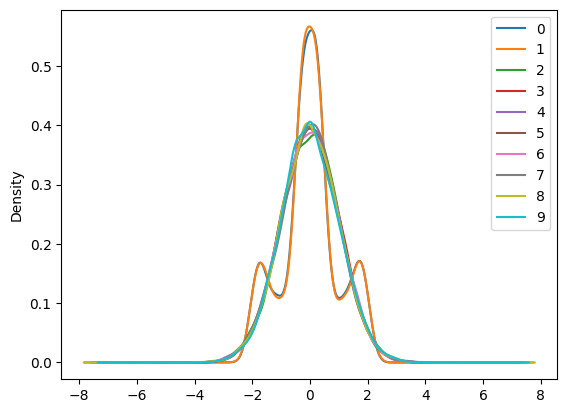

In [14]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca_general = PCA()

In [17]:
pca_general.fit(X_values)

PCA()

In [18]:
explained_variance = pca_general.explained_variance_ratio_

In [19]:
explained_variance

array([0.10401119, 0.10366458, 0.10253852, 0.10147916, 0.10017851,
       0.09905917, 0.09877991, 0.0979775 , 0.09707271, 0.09523875])

In [20]:
eigenvalues = pca_general.explained_variance_

In [21]:
pd.DataFrame(eigenvalues)

,0
0,1.040216
1,1.036749
2,1.025488
3,1.014893
4,1.001885
5,0.990691
6,0.987898
7,0.979873
8,0.970824
9,0.952483


In [22]:
eigenvectors = pca_general.components_

### scree plot

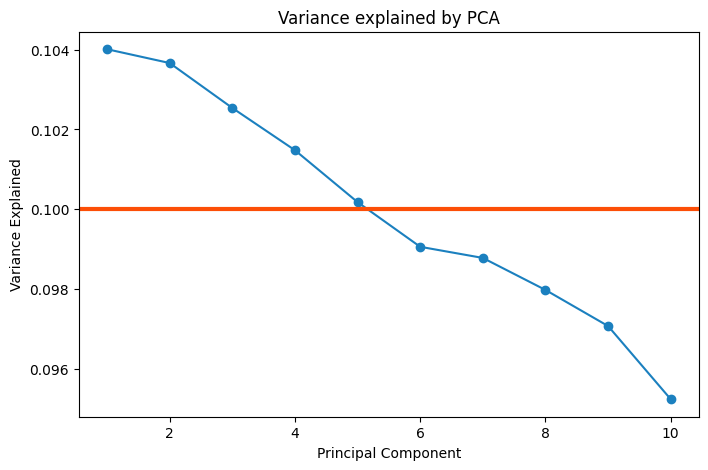

In [23]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [24]:
pca = PCA(n_components=2)

In [25]:
principal_components = pca.fit_transform(X_values)

In [26]:
pd.DataFrame(principal_components).head(8)

,0,1
0,0.430800,0.752997
1,-0.107346,0.976872
2,-0.779032,0.671080
3,0.322601,2.374615
4,1.022340,0.324443
5,0.225195,-0.484200
6,0.554514,0.855918
7,-0.430376,-0.825305


In [27]:
principal_df = pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2'])

In [28]:
final_df = pd.concat([principal_df,df_circles[['target']]],axis=1)

In [29]:
final_df

,principal component 1,principal component 2,target
0,0.430800,0.752997,1
1,-0.107346,0.976872,0
2,-0.779032,0.671080,0
3,0.322601,2.374615,0
4,1.022340,0.324443,0
...,...,...,...
9995,-0.061477,-0.074156,1
9996,1.346620,-0.275216,1
9997,-0.478617,0.695002,1
9998,0.913396,1.068965,0


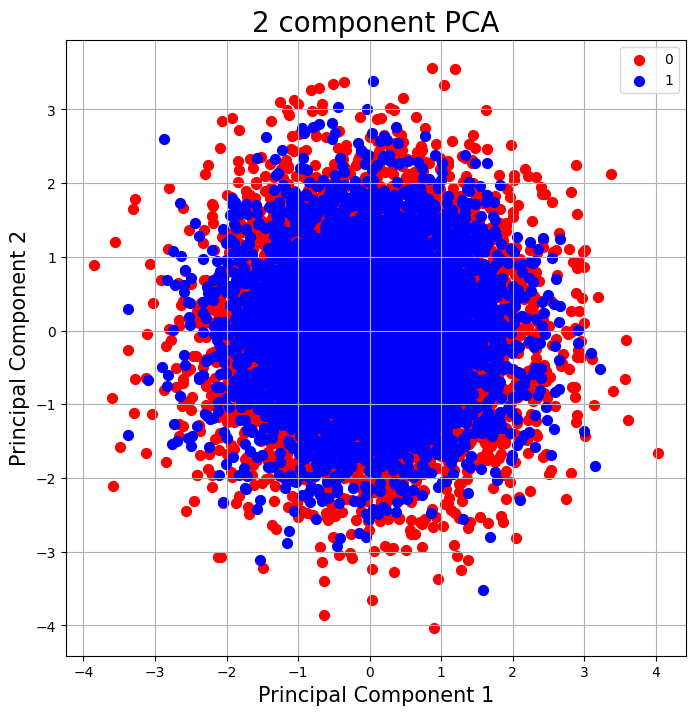

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

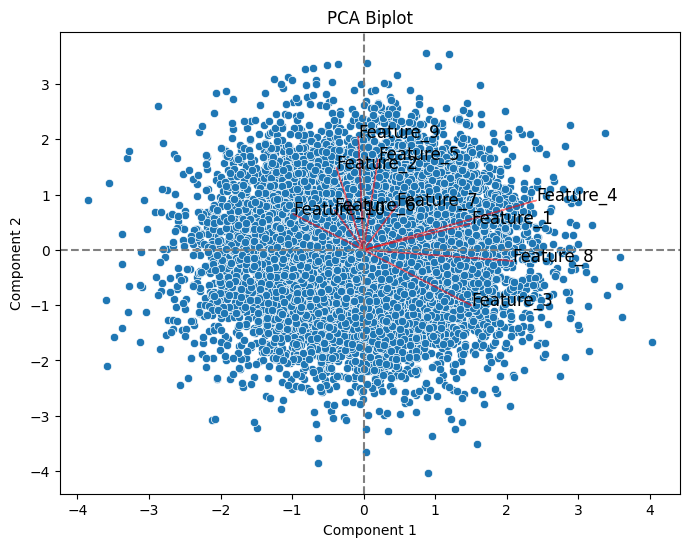

In [31]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_circles.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

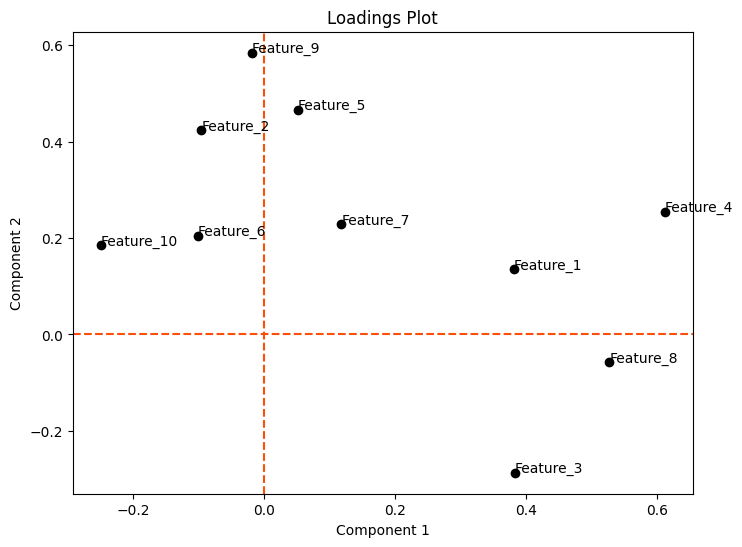

In [32]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_circles.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [33]:
scores_pca = pca.transform(X_values)

In [34]:
pd.DataFrame(scores_pca).head()

,0,1
0,0.430800,0.752997
1,-0.107346,0.976872
2,-0.779032,0.671080
3,0.322601,2.374615
4,1.022340,0.324443


## t-SNE

In [35]:
tsne = TSNE(n_components=2,random_state=42)

In [36]:
X_tsne = tsne.fit_transform(X_values)

In [37]:
tsne_data = np.vstack((X_tsne.T,df_circles['target'])).T

In [38]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [39]:
tsne_df

,dim_1,dim_2,target
0,13.799722,25.570553,1.0
1,74.185371,2.338639,0.0
2,-36.655910,29.925871,0.0
3,75.960144,0.203434,0.0
4,47.394779,-56.377975,0.0
...,...,...,...
9995,11.665401,-20.187479,1.0
9996,-11.354025,-22.301085,1.0
9997,-31.931299,-5.234020,1.0
9998,-15.775186,53.777954,0.0


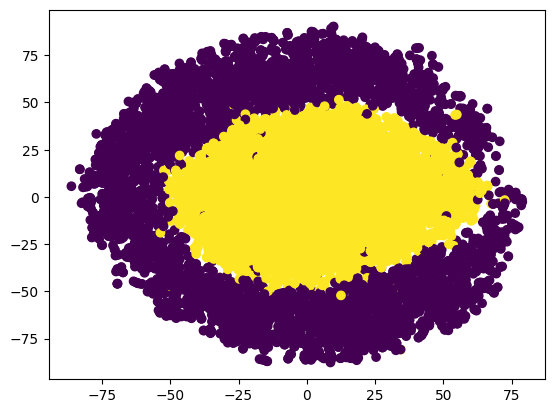

In [40]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [41]:
tsne.kl_divergence_

3.1186435222625732

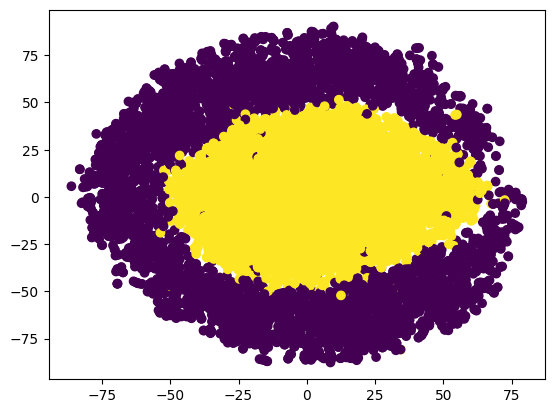

In [42]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [43]:
from sklearn.cluster import KMeans

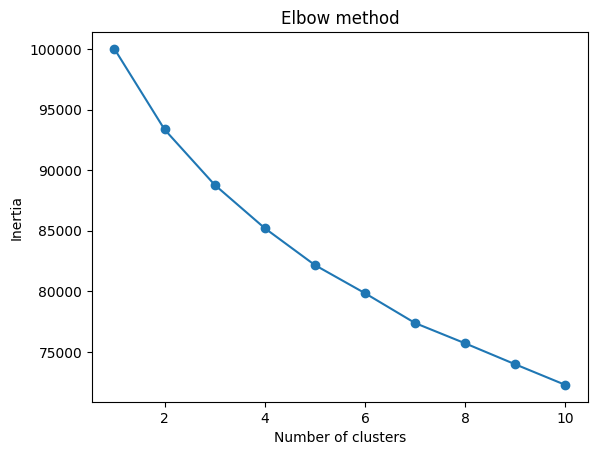

In [44]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=2,init='k-means++')

In [46]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [47]:
df_circles['k_means'] = kmeans.labels_

In [48]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,0.019966,0.062570,0.075801,-0.075423,0.044386,-0.086364,0.033343,-0.083510,1,1
1,1.198440,-0.542104,-0.050118,-0.102131,-0.104756,-0.024050,0.017934,0.024843,0.253703,0.139924,0,0
2,-0.618907,0.728517,-0.086775,0.021638,0.026716,0.127294,-0.341050,0.134362,0.047023,0.073340,0,0
3,1.070839,-0.340617,-0.093467,-0.004380,0.134571,-0.110410,-0.120804,0.057169,0.299109,0.168765,0,0
4,0.843196,-0.502865,-0.057546,-0.022287,0.005023,0.288498,0.007367,0.139431,0.004977,-0.097871,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.076554,-0.052839,-0.029814,-0.152620,0.021773,0.078145,-0.009453,0.049515,1,0
9996,0.239543,0.141312,0.014218,0.133152,-0.161376,-0.008163,0.033173,0.101329,-0.020064,0.057174,1,1
9997,0.108542,0.082195,-0.153277,-0.099898,-0.005207,-0.019770,-0.065780,0.094447,0.148459,-0.095392,1,0
9998,0.483035,0.891054,0.061409,0.225951,-0.057134,0.071337,-0.165984,-0.119157,0.051961,-0.023867,0,1


In [49]:
from scipy.optimize import linear_sum_assignment

y_true = df_circles['target'].values  
y_kmeans = df_circles['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_circles['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_circles['k_means'] == y_true))

accuracy before: 0.4971
accuracy after: 0.5029


In [50]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,0.019966,0.062570,0.075801,-0.075423,0.044386,-0.086364,0.033343,-0.083510,1,0
1,1.198440,-0.542104,-0.050118,-0.102131,-0.104756,-0.024050,0.017934,0.024843,0.253703,0.139924,0,1
2,-0.618907,0.728517,-0.086775,0.021638,0.026716,0.127294,-0.341050,0.134362,0.047023,0.073340,0,1
3,1.070839,-0.340617,-0.093467,-0.004380,0.134571,-0.110410,-0.120804,0.057169,0.299109,0.168765,0,1
4,0.843196,-0.502865,-0.057546,-0.022287,0.005023,0.288498,0.007367,0.139431,0.004977,-0.097871,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.076554,-0.052839,-0.029814,-0.152620,0.021773,0.078145,-0.009453,0.049515,1,1
9996,0.239543,0.141312,0.014218,0.133152,-0.161376,-0.008163,0.033173,0.101329,-0.020064,0.057174,1,0
9997,0.108542,0.082195,-0.153277,-0.099898,-0.005207,-0.019770,-0.065780,0.094447,0.148459,-0.095392,1,1
9998,0.483035,0.891054,0.061409,0.225951,-0.057134,0.071337,-0.165984,-0.119157,0.051961,-0.023867,0,0


In [51]:
print(np.unique(df_circles['target']))

[0 1]


In [52]:
print(np.unique(kmeans.labels_))

[0 1]


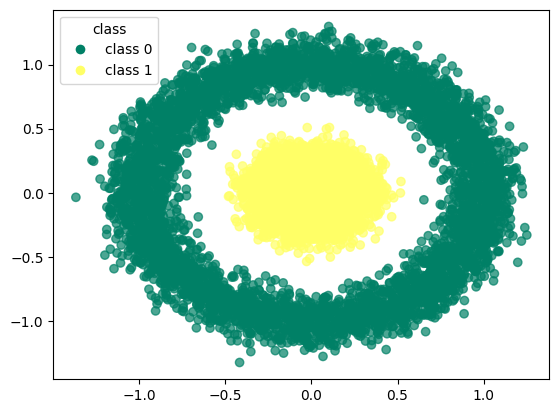

In [53]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_circles['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

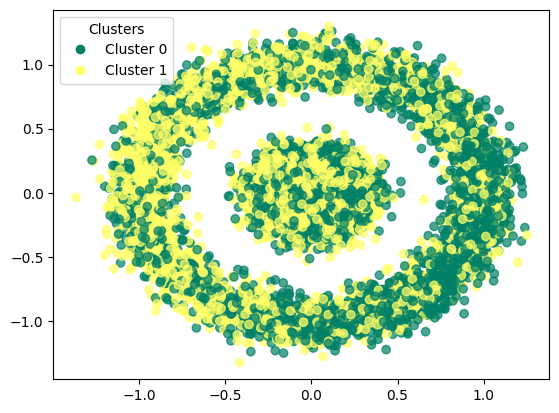

In [54]:
scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_circles['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [55]:
kmeans.cluster_centers_

array([[-0.19504935,  0.0633245 , -0.38353856, -0.52763897,  0.0193815 ,
        -0.08455004, -0.08762766, -0.39875244,  0.02136463,  0.22202275],
       [ 0.18875495, -0.06128097,  0.37116148,  0.51061166, -0.01875604,
         0.08182155,  0.08479985,  0.3858844 , -0.02067517, -0.21485791]])

In [56]:
print(confusion_matrix(df_circles['target'],df_circles['k_means']))

[[2557 2443]
 [2528 2472]]


In [57]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51      5000
           1       0.50      0.49      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### clustering with pca

In [58]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

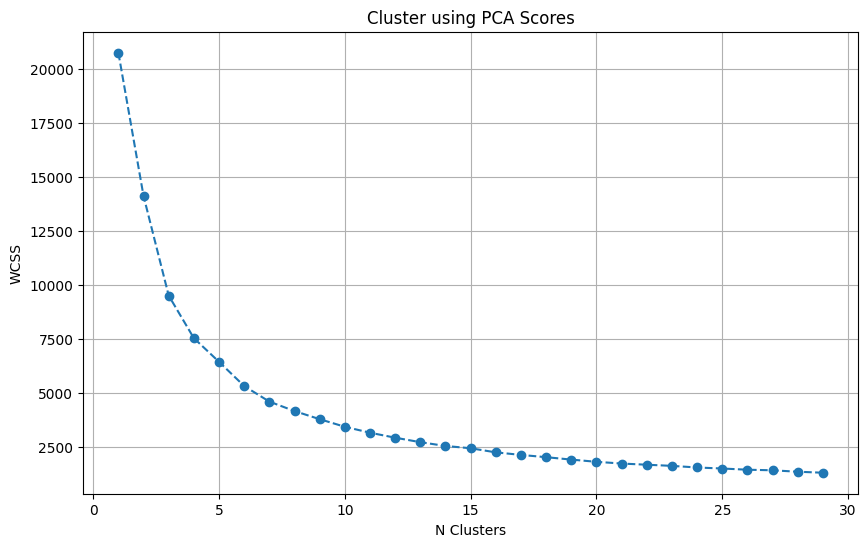

In [59]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [60]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [61]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [62]:
df_pca_kmeans = df_circles.copy()

In [63]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [64]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,0.019966,0.062570,0.075801,-0.075423,0.044386,-0.086364,0.033343,-0.083510,1,0,0
1,1.198440,-0.542104,-0.050118,-0.102131,-0.104756,-0.024050,0.017934,0.024843,0.253703,0.139924,0,1,1
2,-0.618907,0.728517,-0.086775,0.021638,0.026716,0.127294,-0.341050,0.134362,0.047023,0.073340,0,1,1
3,1.070839,-0.340617,-0.093467,-0.004380,0.134571,-0.110410,-0.120804,0.057169,0.299109,0.168765,0,1,1
4,0.843196,-0.502865,-0.057546,-0.022287,0.005023,0.288498,0.007367,0.139431,0.004977,-0.097871,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.076554,-0.052839,-0.029814,-0.152620,0.021773,0.078145,-0.009453,0.049515,1,1,1
9996,0.239543,0.141312,0.014218,0.133152,-0.161376,-0.008163,0.033173,0.101329,-0.020064,0.057174,1,0,0
9997,0.108542,0.082195,-0.153277,-0.099898,-0.005207,-0.019770,-0.065780,0.094447,0.148459,-0.095392,1,1,1
9998,0.483035,0.891054,0.061409,0.225951,-0.057134,0.071337,-0.165984,-0.119157,0.051961,-0.023867,0,0,0


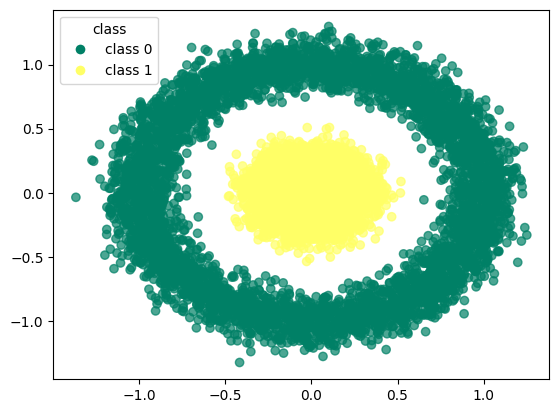

In [65]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

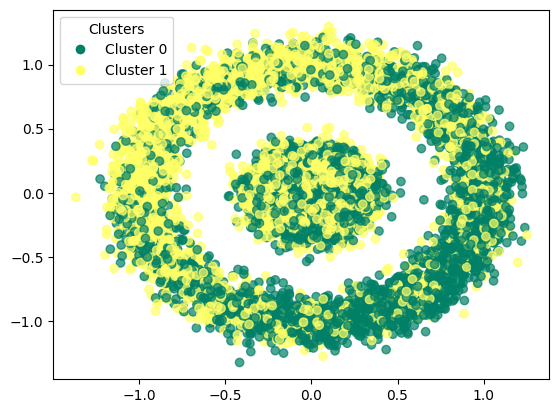

In [66]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [67]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.5026
accuracy after: 0.5026


In [68]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,0.019966,0.062570,0.075801,-0.075423,0.044386,-0.086364,0.033343,-0.083510,1,0,0
1,1.198440,-0.542104,-0.050118,-0.102131,-0.104756,-0.024050,0.017934,0.024843,0.253703,0.139924,0,1,1
2,-0.618907,0.728517,-0.086775,0.021638,0.026716,0.127294,-0.341050,0.134362,0.047023,0.073340,0,1,1
3,1.070839,-0.340617,-0.093467,-0.004380,0.134571,-0.110410,-0.120804,0.057169,0.299109,0.168765,0,1,1
4,0.843196,-0.502865,-0.057546,-0.022287,0.005023,0.288498,0.007367,0.139431,0.004977,-0.097871,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.076554,-0.052839,-0.029814,-0.152620,0.021773,0.078145,-0.009453,0.049515,1,1,1
9996,0.239543,0.141312,0.014218,0.133152,-0.161376,-0.008163,0.033173,0.101329,-0.020064,0.057174,1,0,0
9997,0.108542,0.082195,-0.153277,-0.099898,-0.005207,-0.019770,-0.065780,0.094447,0.148459,-0.095392,1,1,1
9998,0.483035,0.891054,0.061409,0.225951,-0.057134,0.071337,-0.165984,-0.119157,0.051961,-0.023867,0,0,0


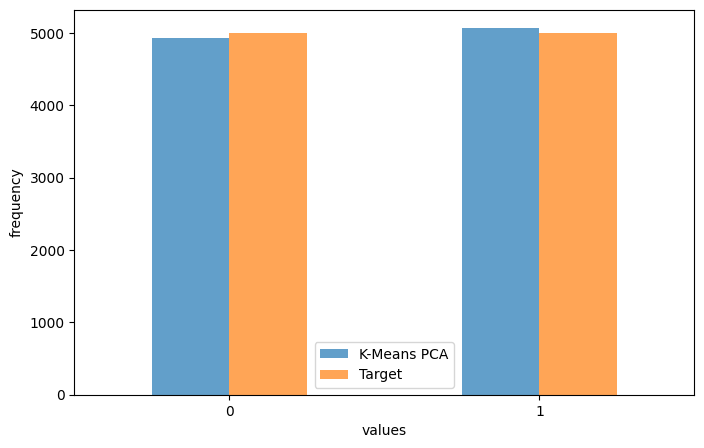

In [69]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [70]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[2480 2520]
 [2454 2546]]


In [71]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51      5000
           1       0.50      0.49      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [72]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



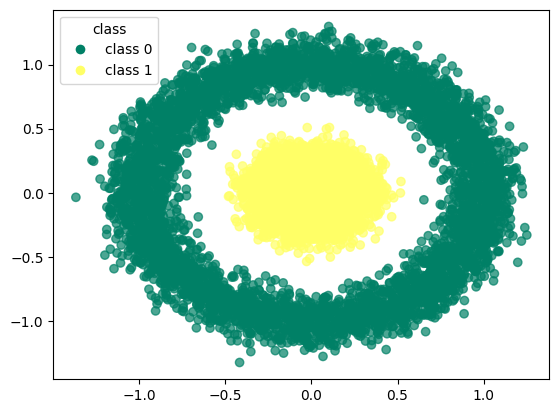

In [73]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

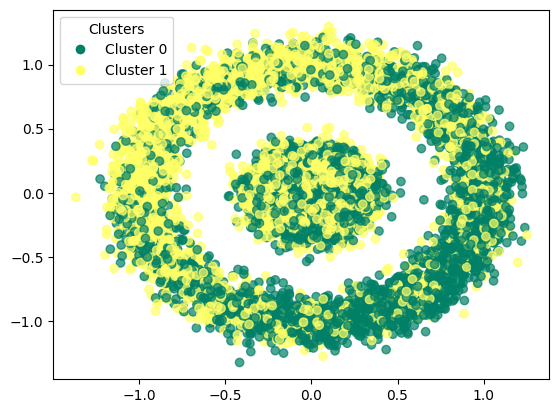

In [74]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

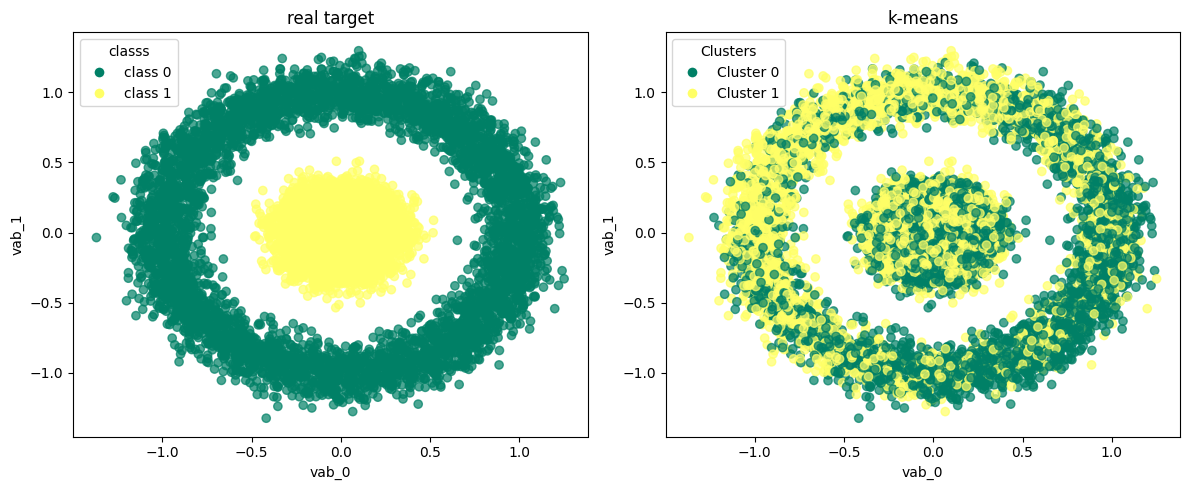

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

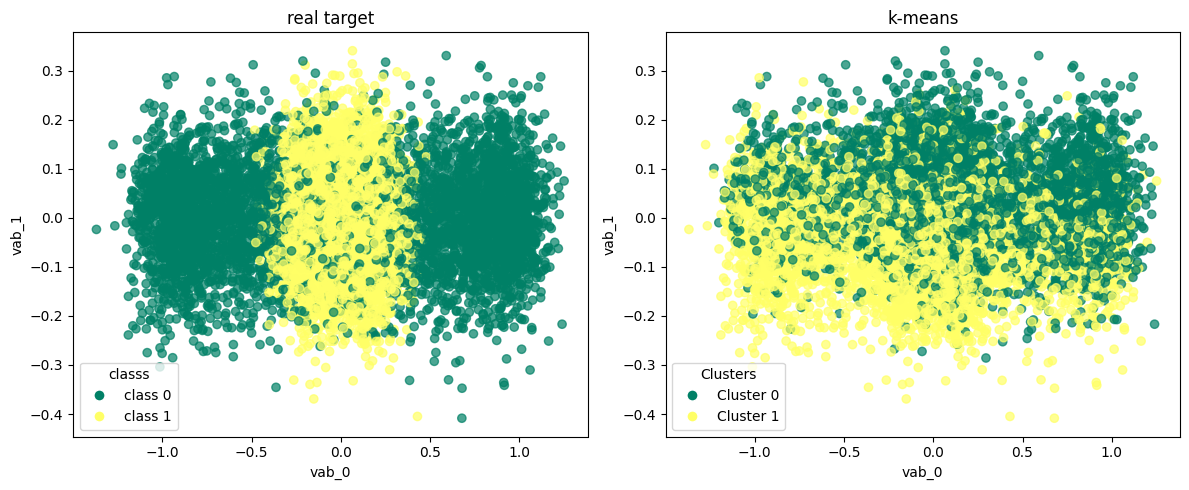

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

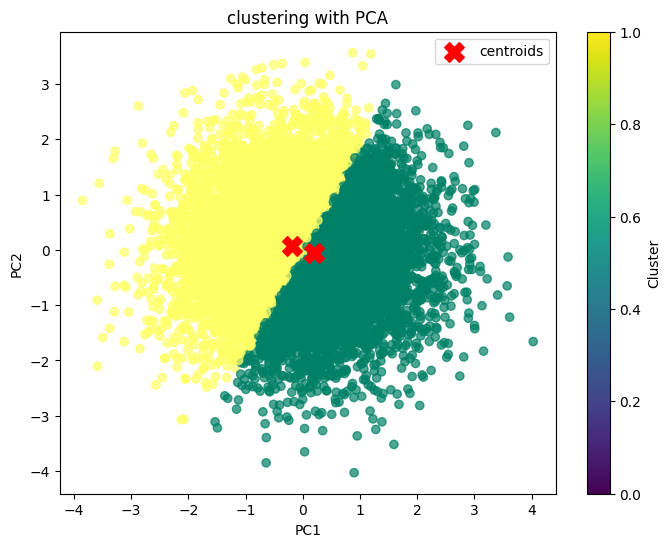

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

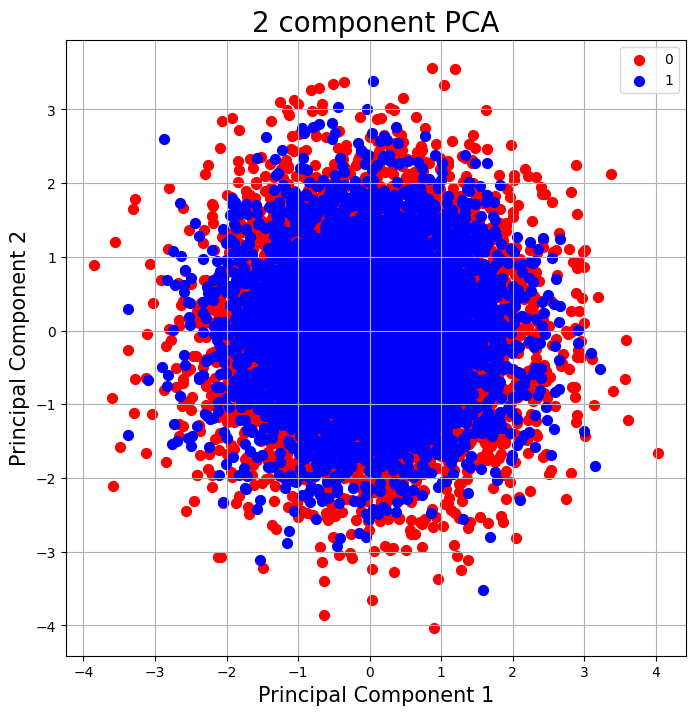

In [78]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [79]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++')

In [80]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2)

In [81]:
df_tsne_kmeans = df_circles.copy()

In [82]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [83]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,0.019966,0.062570,0.075801,-0.075423,0.044386,-0.086364,0.033343,-0.083510,1,0,0
1,1.198440,-0.542104,-0.050118,-0.102131,-0.104756,-0.024050,0.017934,0.024843,0.253703,0.139924,0,1,1
2,-0.618907,0.728517,-0.086775,0.021638,0.026716,0.127294,-0.341050,0.134362,0.047023,0.073340,0,1,0
3,1.070839,-0.340617,-0.093467,-0.004380,0.134571,-0.110410,-0.120804,0.057169,0.299109,0.168765,0,1,1
4,0.843196,-0.502865,-0.057546,-0.022287,0.005023,0.288498,0.007367,0.139431,0.004977,-0.097871,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.076554,-0.052839,-0.029814,-0.152620,0.021773,0.078145,-0.009453,0.049515,1,1,1
9996,0.239543,0.141312,0.014218,0.133152,-0.161376,-0.008163,0.033173,0.101329,-0.020064,0.057174,1,0,1
9997,0.108542,0.082195,-0.153277,-0.099898,-0.005207,-0.019770,-0.065780,0.094447,0.148459,-0.095392,1,1,0
9998,0.483035,0.891054,0.061409,0.225951,-0.057134,0.071337,-0.165984,-0.119157,0.051961,-0.023867,0,0,0


In [84]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.5235
accuracy after: 0.5235


In [85]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,0.019966,0.062570,0.075801,-0.075423,0.044386,-0.086364,0.033343,-0.083510,1,0,0
1,1.198440,-0.542104,-0.050118,-0.102131,-0.104756,-0.024050,0.017934,0.024843,0.253703,0.139924,0,1,1
2,-0.618907,0.728517,-0.086775,0.021638,0.026716,0.127294,-0.341050,0.134362,0.047023,0.073340,0,1,0
3,1.070839,-0.340617,-0.093467,-0.004380,0.134571,-0.110410,-0.120804,0.057169,0.299109,0.168765,0,1,1
4,0.843196,-0.502865,-0.057546,-0.022287,0.005023,0.288498,0.007367,0.139431,0.004977,-0.097871,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.076554,-0.052839,-0.029814,-0.152620,0.021773,0.078145,-0.009453,0.049515,1,1,1
9996,0.239543,0.141312,0.014218,0.133152,-0.161376,-0.008163,0.033173,0.101329,-0.020064,0.057174,1,0,1
9997,0.108542,0.082195,-0.153277,-0.099898,-0.005207,-0.019770,-0.065780,0.094447,0.148459,-0.095392,1,1,0
9998,0.483035,0.891054,0.061409,0.225951,-0.057134,0.071337,-0.165984,-0.119157,0.051961,-0.023867,0,0,0


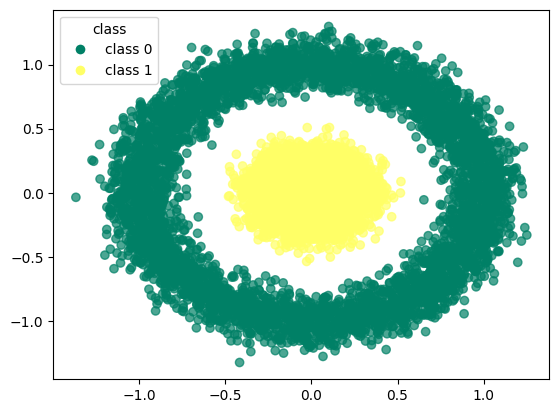

In [86]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

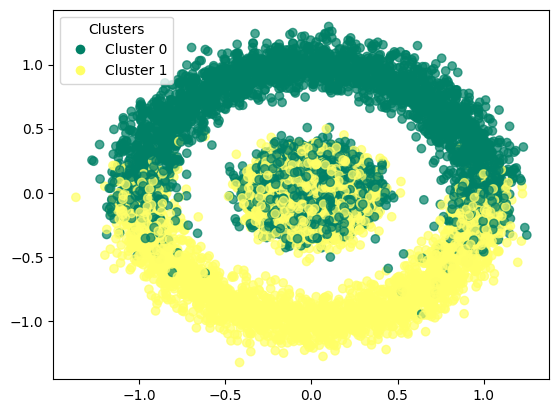

In [87]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0],df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'],cmap='summer',alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

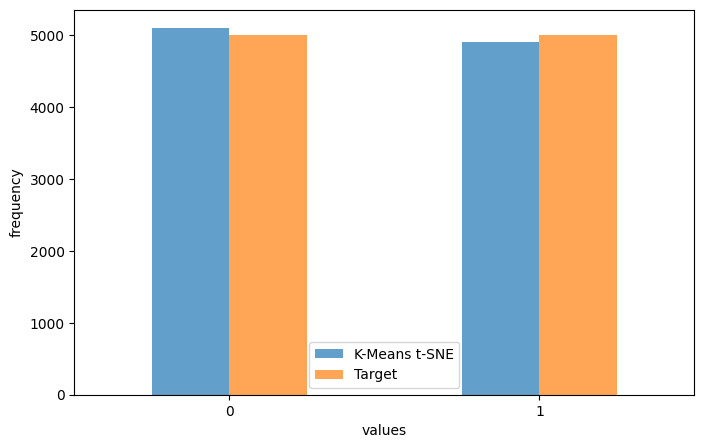

In [88]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar',figsize=(8, 5),alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [89]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[2666 2334]
 [2431 2569]]


In [90]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.52      0.53      0.53      5000
           1       0.52      0.51      0.52      5000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



In [91]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [92]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51      5000
           1       0.50      0.49      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

